In [9]:
import numpy as np
import matplotlib.pyplot as plt



In [5]:
from IPython.display import display, HTML

title = "Illustrating the Central Limit Theorem (CLT) with common distributions"
subtitle = "for ex, uniform, normal, exponential, binomial"
html_code = f"<h1 style='font-size:50px; color:Grey; text-align:center;'>{title}</h1>"
display(HTML(html_code))
html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
display(HTML(html_code2))


In [11]:
# define simple functions to generate familiar distributions
def gen_std_uniform(size_val=None):
    val = np.random.uniform(low=0.0, high=1.0, size=size_val)
    return val

def gen_std_normal(size_val=None):
    val = np.random.normal(loc=0.0, scale=1.0, size=size_val)
    #np.random.standard_normal(size=None) # alternative syntax
    return val

def gen_rand_dig(size_val=None):
    val = np.random.randint(1, 10,size=size_val)
    return val

def gen_exp(size_val=None):
    val = np.random.exponential(scale=1.0, size=size_val)
    return val
    
def gen_pois(size_val=None):
    val = np.random.poisson(lam=1.0, size=size_val)
    return val

def gen_binom(size_val=None):
    val = np.random.binomial(n=1, p=0.5, size=size_val)
    return val



['uniform distr', 'normal distr', 'digit distr', 'exp distr', 'pois distr', 'binom distr']


 
uniform
uniform distribution stats:
Distr mean: 0.497
Distr stdev: 0.291
Distr range: (0.000,1.000)
 
normal
normal distribution stats:
Distr mean: -0.015
Distr stdev: 1.012
Distr range: (-3.508,4.113)
 
digit
digit distribution stats:
Distr mean: 5.017
Distr stdev: 2.597
Distr range: (1.000,9.000)
 
exp
exp distribution stats:
Distr mean: 1.006
Distr stdev: 1.018
Distr range: (0.000,11.157)
 
pois
pois distribution stats:
Distr mean: 1.018
Distr stdev: 1.017
Distr range: (0.000,7.000)
 
binom
binom distribution stats:
Distr mean: 0.502
Distr stdev: 0.500
Distr range: (0.000,1.000)


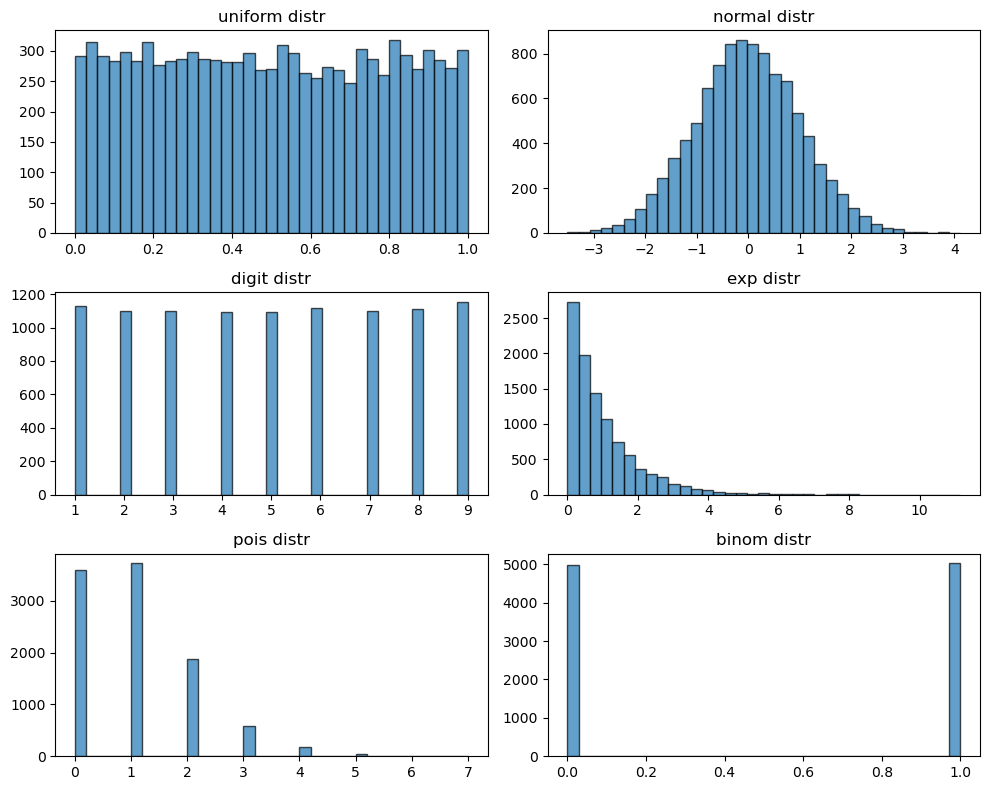

In [71]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_histograms(datasets,titles=None, bins=35, figsize=(10, 8)):
    """
    Plots multiple histograms from an array of datasets in a dynamic grid of subplots.
    
    Parameters:
        datasets (list or array): List/array of NumPy arrays or lists for histogram plotting.
        bins (int): Number of bins in the histogram (default=30).
        figsize (tuple): Figure size (default=(10, 8)).
    """
    num_plots = len(datasets)
    if num_plots == 0:
        print("No data provided.")
        return
    
    # Determine subplot grid size
    rows = int(np.ceil(np.sqrt(num_plots)))
    cols = int(np.ceil(num_plots / rows))

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = np.array(axes)  # Ensure it's always an array for easy iteration
    axes = axes.flatten() if num_plots > 1 else [axes]  # Flatten if needed

    for i, data in enumerate(datasets):
        axes[i].hist(data, bins=bins, alpha=0.7, edgecolor='black')
        if titles==None:
            axes[i].set_title(f"Histogram {i+1}")
        else:
            title_val=titles[i]
            axes[i].set_title(f"{title_val}")

#        axes[i].set_title(f"Histogram {i+1}")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## using above [static] functions to simplify syntax
def distr_gen_2(n,distr='uniform'):
    if distr=='uniform':
        distr_arr=gen_std_uniform(n)
    elif distr=='normal':
        distr_arr=gen_std_normal(n)
    elif distr=='digit':
        distr_arr=gen_rand_dig(n)
    elif distr=='exp':
        distr_arr=gen_exp(n)
    elif distr=='pois':
        distr_arr=gen_pois(n)
    elif distr=='binom':
        distr_arr=gen_binom(n)
    distr_mean_est= np.mean(distr_arr)
    distr_std_est= np.std(distr_arr,ddof=1)
    distr_SEmean_est= distr_std_est/np.sqrt(n)

    distr_range_low= np.min(distr_arr)
    distr_range_high= np.max(distr_arr)

    #print mean, stdev    
    print(F"{distr} distribution stats:")
    print(F"Distr mean: {distr_mean_est:.3f}")
    print(F"Distr stdev: {distr_std_est:.3f}")
    print(F"Distr range: ({distr_range_low:.3f},{distr_range_high:.3f})")
    return distr_arr


#distr_gen(10000)
#distr_gen(100)
#title_list=['hist0','hist1','hist2','hist3']
#distr_list = ['uniform','normal','digit','binom']
distr_list = ['uniform','normal','digit','exp','pois','binom']

title_list = [x+' distr' for x in  distr_list]
print(title_list)

n=10000

title = "Common distributions"
html_code = f"<h1 style='font-size:50px; color:Grey; text-align:center;'>{title}</h1>"
display(HTML(html_code))
subtitle = F"{n:,} observations from underlying distribution."
html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
display(HTML(html_code2))


distr_arrays=[]
for i,distr in enumerate(distr_list):
    print(' ')
    print(distr)
    distr_array=distr_gen_2(n,distr)
    #print(distr_array)
    distr_arrays.append(distr_array)  
    #print(distr_arrays)
    
plot_multiple_histograms(distr_arrays,titles=title_list)
#plot_multiple_histograms(data_list)


['uniform distr', 'normal distr', 'digit distr', 'exp distr', 'pois distr', 'binom distr']


 
uniform
uniform distribution stats:
Mean of sample means: 0.488
 
normal
normal distribution stats:
Mean of sample means: -0.013
 
digit
digit distribution stats:
Mean of sample means: 5.036
 
exp
exp distribution stats:
Mean of sample means: 1.060
 
pois
pois distribution stats:
Mean of sample means: 1.003
 
binom
binom distribution stats:
Mean of sample means: 0.496


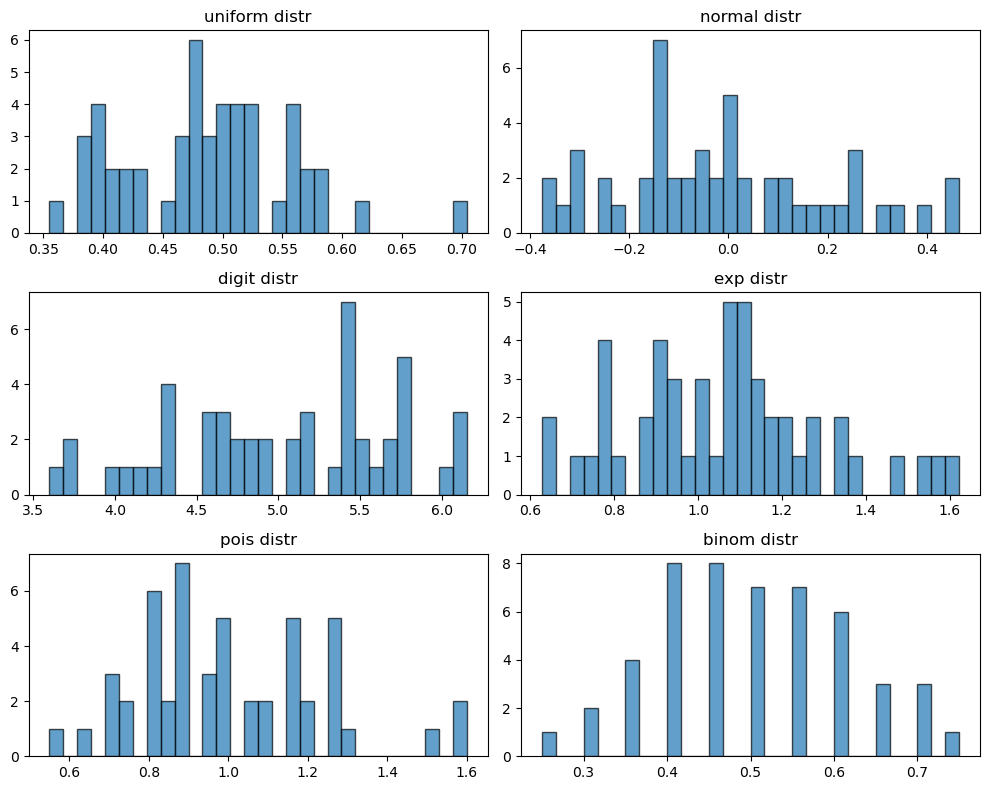

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_histograms(datasets,titles=None, bins=30, figsize=(10, 8)):
    """
    Plots multiple histograms from an array of datasets in a dynamic grid of subplots.
    
    Parameters:
        datasets (list or array): List/array of NumPy arrays or lists for histogram plotting.
        bins (int): Number of bins in the histogram (default=30).
        figsize (tuple): Figure size (default=(10, 8)).
    """
    num_plots = len(datasets)
    if num_plots == 0:
        print("No data provided.")
        return
    
    # Determine subplot grid size
    rows = int(np.ceil(np.sqrt(num_plots)))
    cols = int(np.ceil(num_plots / rows))

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = np.array(axes)  # Ensure it's always an array for easy iteration
    axes = axes.flatten() if num_plots > 1 else [axes]  # Flatten if needed

    for i, data in enumerate(datasets):
        axes[i].hist(data, bins=bins, alpha=0.7, edgecolor='black')
        if titles==None:
            axes[i].set_title(f"Histogram {i+1}")
        else:
            title_val=titles[i]
            axes[i].set_title(f"{title_val}")

#        axes[i].set_title(f"Histogram {i+1}")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## using above [static] functions to simplify syntax
def distr_gen_2_repeat(n,repetitions,distr='uniform'):
    mean_list=[]
    
    for i in range(repetitions):
        if distr=='uniform':
            distr_arr=gen_std_uniform(n)
        elif distr=='normal':
            distr_arr=gen_std_normal(n)
        elif distr=='digit':
            distr_arr=gen_rand_dig(n)
        elif distr=='exp':
            distr_arr=gen_exp(n)
        elif distr=='pois':
            distr_arr=gen_pois(n)
        elif distr=='binom':
            distr_arr=gen_binom(n)
        distr_mean_est= np.mean(distr_arr)
        #distr_std_est= np.std(distr_arr,ddof=1)
        #distr_SEmean_est= distr_std_est/np.sqrt(n)
        
        distr_range_low= np.min(distr_arr)
        distr_range_high= np.max(distr_arr)

        #mean_list=mean_list.append(distr_mean_est) 
        mean_list=mean_list+[distr_mean_est]
        #mean_list=+distr_mean_est
       # print(mean_list)

    mean_of_mean=np.mean(mean_list)
    #chk_mean_ct=len(mean_list)
    #stdev_of_mean=np.std(mean_list,ddof=1)
    #se_of_mean=stdev_of_mean/sqrt(n)
    
    #print mean, stdev    
    print(F"{distr} distribution stats:")
    print(F"Mean of sample means: {mean_of_mean:.3f}")
    #print(F"Count of sample means drawn: {chk_mean_ct}")
   # print(F"Mean of sample stdevs: {distr_std_est:.3f}")
    #print(F"Mean of sample means: ({distr_range_low:.3f},{distr_range_high:.3f})")
    return mean_list


#distr_gen(1000)
#distr_gen(100)
#title_list=['hist0','hist1','hist2','hist3']
distr_list = ['uniform','normal','digit','exp','pois','binom']
title_list = [x+' distr' for x in  distr_list]
print(title_list)

#n=20
#repetitions=1000

title = "Sample mean distribution"
html_code = f"<h1 style='font-size:50px; color:Grey; text-align:center;'>{title}</h1>"
display(HTML(html_code))

def sample_mean_distr(n=20,repetitions=1000):
    subtitle = F"{n:,} observations from underlying distribution."
    html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
    display(HTML(html_code2))
    
    subtitle = F"{repetitions:,} samples of this size (repetitions)."
    html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
    display(HTML(html_code2))
    
    
    distr_arrays=[]
    for i,distr in enumerate(distr_list):
        print(' ')
        print(distr)
        distr_array=distr_gen_2_repeat(n,repetitions,distr)
      #  print(distr_array)
        distr_arrays.append(distr_array)  
        #print(distr_arrays)
        
    plot_multiple_histograms(distr_arrays,titles=title_list)
    #plot_multiple_histograms(data_list)


sample_mean_distr(n=20,repetitions=50)


 
uniform
uniform distribution stats:
Mean of sample means: 0.501
 
normal
normal distribution stats:
Mean of sample means: 0.005
 
digit
digit distribution stats:
Mean of sample means: 5.011
 
exp
exp distribution stats:
Mean of sample means: 1.002
 
pois
pois distribution stats:
Mean of sample means: 1.009
 
binom
binom distribution stats:
Mean of sample means: 0.497


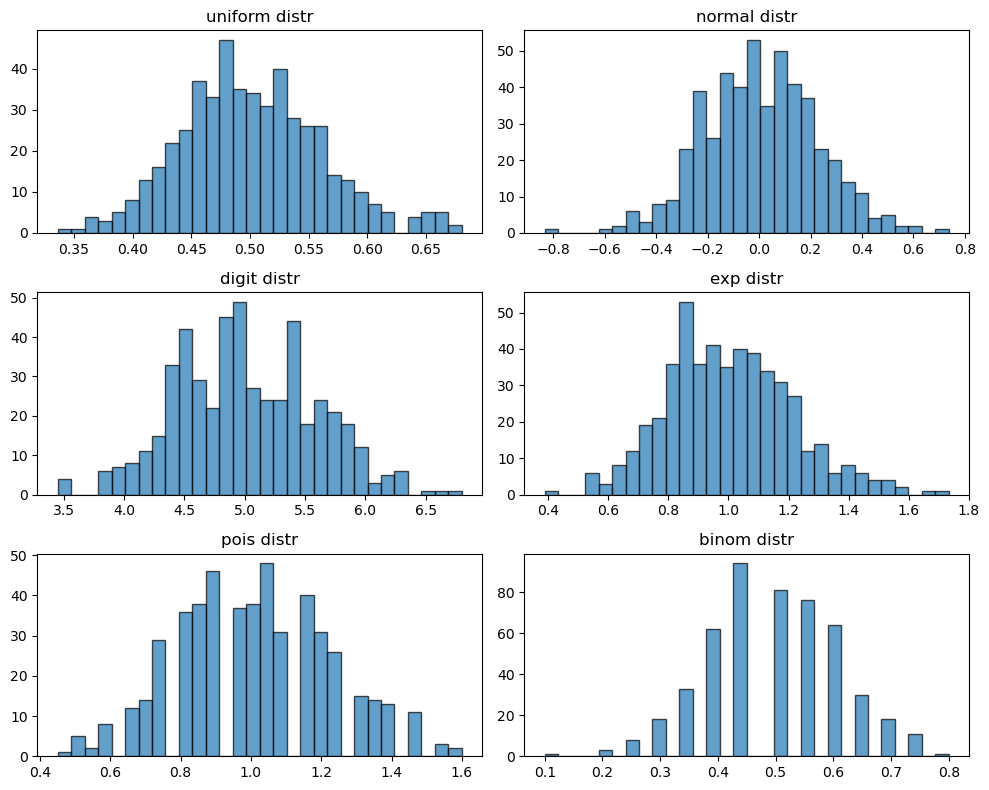

In [45]:
sample_mean_distr(n=20,repetitions=500)


 
uniform
uniform distribution stats:
Mean of sample means: 0.500
 
normal
normal distribution stats:
Mean of sample means: 0.010
 
digit
digit distribution stats:
Mean of sample means: 4.984
 
exp
exp distribution stats:
Mean of sample means: 0.999
 
pois
pois distribution stats:
Mean of sample means: 1.002
 
binom
binom distribution stats:
Mean of sample means: 0.506


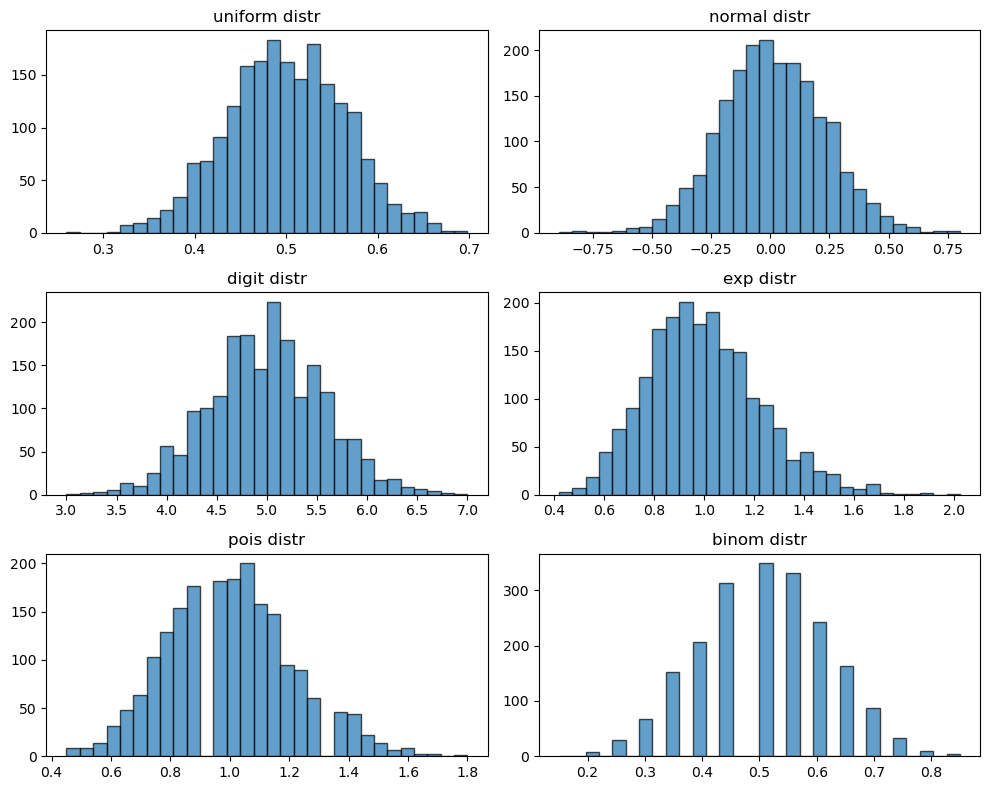

In [51]:
subtitle = F"... note increasingly 'normal' (bell curve shape) distribution as more and more samples are pulled."
html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
display(HTML(html_code2))


sample_mean_distr(n=20,repetitions=2000)


In [ ]:
# what mean and variance parameters would yeild equivalent & standard normal distribution for each of the distributions?

#use ChatGPT to solve this
# https://chatgpt.com/share/67d49651-ccb8-800f-8f86-f57f6dadf1b9

[ 0.20322878  0.36167683  0.41575252 -0.51631186  0.26498739 -1.08261265
  1.50294196 -1.17163207 -1.20490344 -1.25977989]
['uniform distr', 'normal distr', 'digit distr', 'exp distr', 'pois distr', 'binom distr']


 
uniform
uniform distribution stats:
Mean of sample means: -0.001
 
normal
normal distribution stats:
Mean of sample means: 0.000
 
digit
digit distribution stats:
Mean of sample means: -0.002
 
exp
exp distribution stats:
Mean of sample means: 0.001
 
pois
pois distribution stats:
Mean of sample means: -0.001
 
binom
binom distribution stats:
Mean of sample means: 0.000


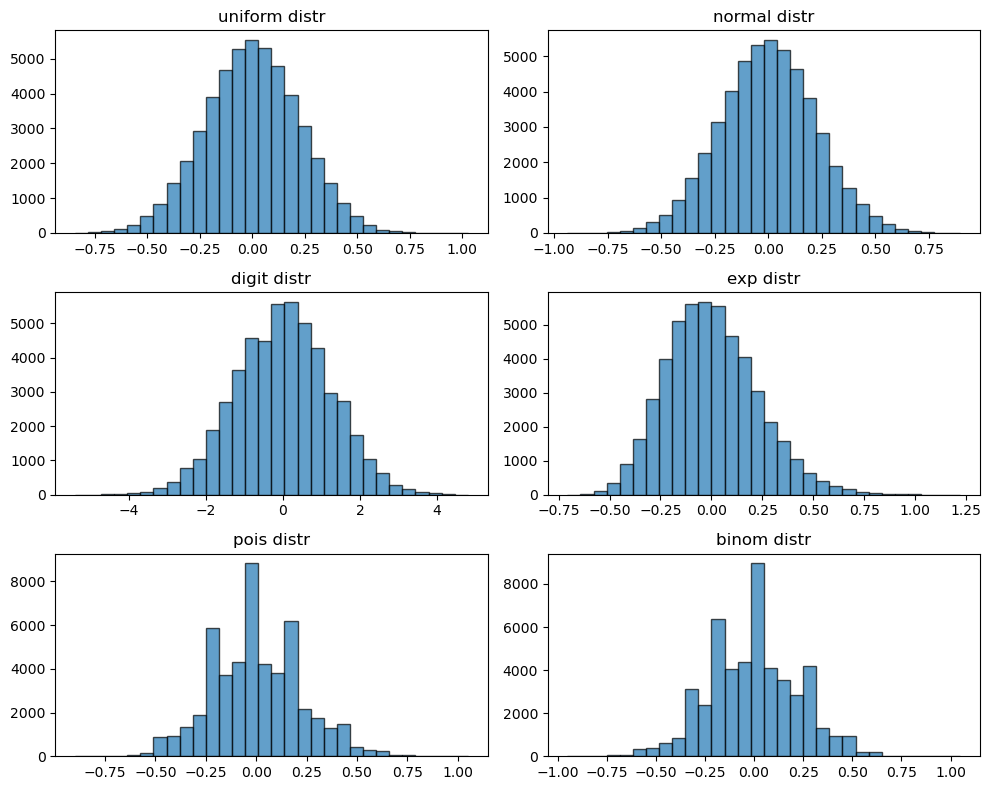

In [91]:
# define simple functions to generate familiar distributions
def gen_uniform_2(size_val=None):
    val = np.random.uniform(low=np.round(np.sqrt(3),5)*-1, high=np.round(np.sqrt(3),5), size=size_val)
    return val


def gen_std_normal(size_val=None): #same
    val = np.random.normal(loc=0.0, scale=1.0, size=size_val)
    #np.random.standard_normal(size=None) # alternative syntax
    return val

def gen_rand_dig_2(size_val=None):
    val = np.random.randint(-9, 10,size=size_val) # top of range excluded
    return val

def gen_exp_2(size_val=None):
    val = np.random.exponential(scale=1.0, size=size_val) -1  #requires transformation of the random variable
    return val
    
def gen_pois_2(size_val=None):
    val = np.random.poisson(lam=1.0, size=size_val) -1 #requires transformation of the random variable
    return val

def gen_binom_2(size_val=None):
    val = (np.random.binomial(n=4, p=0.5, size=size_val)-2)  #requires transformation of the random variable
    return val


print(gen_uniform_2(10))


import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_histograms(datasets,titles=None, bins=30, figsize=(10, 8)):
    """
    Plots multiple histograms from an array of datasets in a dynamic grid of subplots.
    
    Parameters:
        datasets (list or array): List/array of NumPy arrays or lists for histogram plotting.
        bins (int): Number of bins in the histogram (default=30).
        figsize (tuple): Figure size (default=(10, 8)).
    """
    num_plots = len(datasets)
    if num_plots == 0:
        print("No data provided.")
        return
    
    # Determine subplot grid size
    rows = int(np.ceil(np.sqrt(num_plots)))
    cols = int(np.ceil(num_plots / rows))

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = np.array(axes)  # Ensure it's always an array for easy iteration
    axes = axes.flatten() if num_plots > 1 else [axes]  # Flatten if needed

    for i, data in enumerate(datasets):
        axes[i].hist(data, bins=bins, alpha=0.7, edgecolor='black')
        if titles==None:
            axes[i].set_title(f"Histogram {i+1}")
        else:
            title_val=titles[i]
            axes[i].set_title(f"{title_val}")

#        axes[i].set_title(f"Histogram {i+1}")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## using above [static] functions to simplify syntax
def distr_gen_2_repeat_2(n,repetitions,distr='uniform'):
    mean_list=[]
    
    for i in range(repetitions):
        if distr=='uniform':
            distr_arr=gen_uniform_2(n)
        elif distr=='normal':
            distr_arr=gen_std_normal(n)
        elif distr=='digit':
            distr_arr=gen_rand_dig_2(n)
        elif distr=='exp':
            distr_arr=gen_exp_2(n)
        elif distr=='pois':
            distr_arr=gen_pois_2(n)
        elif distr=='binom':
            distr_arr=gen_binom_2(n)
        distr_mean_est= np.mean(distr_arr)
        #distr_std_est= np.std(distr_arr,ddof=1)
        #distr_SEmean_est= distr_std_est/np.sqrt(n)
        
        distr_range_low= np.min(distr_arr)
        distr_range_high= np.max(distr_arr)

        mean_list.append(distr_mean_est) 
        #mean_list=mean_list+[distr_mean_est]
        #mean_list=+distr_mean_est
       # print(mean_list)

    mean_of_mean=np.mean(mean_list)
    #chk_mean_ct=len(mean_list)
    #stdev_of_mean=np.std(mean_list,ddof=1)
    #se_of_mean=stdev_of_mean/sqrt(n)
    
    #print mean, stdev    
    print(F"{distr} distribution stats:")
    print(F"Mean of sample means: {mean_of_mean:.3f}")
    #print(F"Count of sample means drawn: {chk_mean_ct}")
   # print(F"Mean of sample stdevs: {distr_std_est:.3f}")
    #print(F"Mean of sample means: ({distr_range_low:.3f},{distr_range_high:.3f})")
    return mean_list


#distr_gen(1000)
#distr_gen(100)
#title_list=['hist0','hist1','hist2','hist3']
distr_list = ['uniform','normal','digit','exp','pois','binom']
title_list = [x+' distr' for x in  distr_list]
print(title_list)

#n=20
#repetitions=1000

title = "Sample mean distribution (normalized input parameters)"
title2 = "...adjusted input parameters for each of these distributions"
html_code = f"<h1 style='font-size:40px; color:Grey; text-align:center;'>{title}</h1>"
display(HTML(html_code))
html_code = f"<h1 style='font-size:30px; color:Grey; text-align:center;'>{title2}</h1>"
display(HTML(html_code))
title3 = "... to create comparable, standard normal distribution with outputs"
html_code = f"<h1 style='font-size:30px; color:Grey; text-align:center;'>{title3}</h1>"
display(HTML(html_code))

def sample_mean_distr(n=20,repetitions=100000):
    subtitle = F"{n:,} observations from underlying distribution."
    html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
    display(HTML(html_code2))
    
    subtitle = F"{repetitions:,} samples of this size (repetitions)."
    html_code2 = f"<h1 style='font-size:20px; color:Grey; text-align:center;'>{subtitle}</h1>"
    display(HTML(html_code2))
    
    
    distr_arrays=[]
    for i,distr in enumerate(distr_list):
        print(' ')
        print(distr)
        distr_array=distr_gen_2_repeat_2(n,repetitions,distr)
      #  print(distr_array)
        distr_arrays.append(distr_array)  
        #print(distr_arrays)
        
    plot_multiple_histograms(distr_arrays,titles=title_list)
    #plot_multiple_histograms(data_list)


sample_mean_distr(n=20,repetitions=50000)
